# 📊 Estadística descriptiva - Análisis de eficiencia e impacto de GAIA en la comunidad educativa UPB

Luisa Maria Florez Munera

Samuel Perez Hurtado

Miguel Ángel Velez Suarez

In [1]:
#Se importan las librerias pandas y matplotlib, se descargan los datos y se guardan en un dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!wget -q 'https://robertohincapie.com/data/gaia.csv'
data = pd.read_csv("gaia.csv", sep = ";", encoding="latin-1")

data.head()

,Curso,Nota,Talleres profe,Talleres Monitor,Asesorías profe,Asesorías monitor
0,Cálculo diferencial,0.0,0,0,0,0
1,Cálculo diferencial,0.0,0,0,0,0
2,Cálculo diferencial,0.0,0,0,0,0
3,Cálculo diferencial,0.0,0,0,0,0
4,Cálculo diferencial,0.0,0,0,0,0


In [2]:
# data['Total asistencias'] = data["Asesorías profe"] + data["Asesorías monitor"] + data["Talleres Monitor"] + data["Talleres profe"]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Curso              4044 non-null   object 
 1   Nota               4044 non-null   float64
 2   Talleres profe     4044 non-null   int64  
 3   Talleres Monitor   4044 non-null   int64  
 4   Asesorías profe    4044 non-null   int64  
 5   Asesorías monitor  4044 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 189.7+ KB


En la información de los datos tenemos que son 4044 entradas, no hay datos nulos en ningún atributo y los tipos están bien clasificados

In [4]:
# from ydata_profiling import ProfileReport
# ProfileReport(data)

Inicialmente, antes de hacer el análisis exploratorio, se usa la librería pandas-profiling para analizar las correlaciones e interacciones entre variables. En este caso, se encuentra que hay una pequeña interacción entre la nota y los talleres que realizan los profesores, ya que se puede ver mediante el mapa de calor que los estudiantes que van a estos son los que ganan la materia. Sin embargo, no ocurre lo mismo con las asesorías y los talleres que realizan los monitores.

Por otro lado, en cuanto a las correlaciones se puede observar que la nota no depende de ninguna actividad a realizar, por lo que NO se puede concluir que a más talleres o asesorías a los que asiste un estudiante, mayor será su nota. Asistir a algún tipo de apoyo en GAIA no es garantía de ganar.

# **Cantidad talleres y asesorías**

In [5]:
talleresprofe=data['Talleres profe'].value_counts() # 869 asistencia en talleres dictados
# por profesores
talleresprofe=talleresprofe.loc[talleresprofe.index>0].sum()
print('Estudiantes que asisten: ', talleresprofe)
print('Estudiantes que no asisten: ', data['Talleres profe'].value_counts().sum()-talleresprofe)

Estudiantes que asisten:  869
Estudiantes que no asisten:  3175


In [6]:
asesoriasprofe=data['Asesorías profe'].value_counts() #274 asistencia en asesorías de profesores
asesoriasprofe=asesoriasprofe.loc[asesoriasprofe.index>0].sum()
print('Estudiantes que asisten: ', asesoriasprofe)
print('Estudiantes que no asisten: ', data['Asesorías profe'].value_counts().sum()-asesoriasprofe)

Estudiantes que asisten:  274
Estudiantes que no asisten:  3770


In [7]:
talleresmonitor=data['Talleres Monitor'].value_counts() #439 asistencia en talleres dictados por monitores
talleresmonitor=talleresmonitor.loc[talleresmonitor.index>0].sum()
print('Estudiantes que asisten: ', talleresmonitor)
print('Estudiantes que no asisten: ', data['Talleres Monitor'].value_counts().sum()-talleresmonitor)

Estudiantes que asisten:  439
Estudiantes que no asisten:  3605


In [8]:
asesoriasmonitor=data['Asesorías monitor'].value_counts() #352 asistencia en asesorías de monitores
asesoriasmonitor=asesoriasmonitor.loc[asesoriasmonitor.index>0].sum()
print('Estudiantes que asisten: ', asesoriasmonitor)
print('Estudiantes que no asisten: ', data['Asesorías monitor'].value_counts().sum()-asesoriasmonitor)

Estudiantes que asisten:  352
Estudiantes que no asisten:  3692


In [9]:
data['Curso'].value_counts() #Número de registros por cada uno de los cursos

Geometría Analítica    1373
Cálculo integral       1363
Cálculo diferencial    1308
Name: Curso, dtype: int64

In [10]:
data.describe()

,Nota,Talleres profe,Talleres Monitor,Asesorías profe,Asesorías monitor
count,4044.000000,4044.000000,4044.000000,4044.000000,4044.000000
mean,3.135005,0.549703,0.190158,0.122404,0.163205
std,0.866247,1.406937,0.677684,0.588540,0.956678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000
50%,3.200000,0.000000,0.000000,0.000000,0.000000
75%,3.640000,0.000000,0.000000,0.000000,0.000000
max,5.000000,13.000000,7.000000,11.000000,35.000000


Tenemos que la media de la nota para los estudiantes es de 3.13, la asistencia a talleres de profesores es de 0.55, la asistencia a talleres de monitores es de 0.19, la asistencia a asesorías de profesores es de 0.12 y la asistencia a asesorías de monitores de 0.16. Sin embargo, esta medida de tendencia central es muy sensible a valores extremos por lo que los cuantiles nos dan una idea más amplia de los datos.

En la nota, se tiene que el 25% o menos es de 3.0, lo que quiere decir que más del 75% ganaron la materia; en las asistencias se evidencia que más del 75% no asistieron a ningún tipo de asesoría o taller.

# **Boxplot**

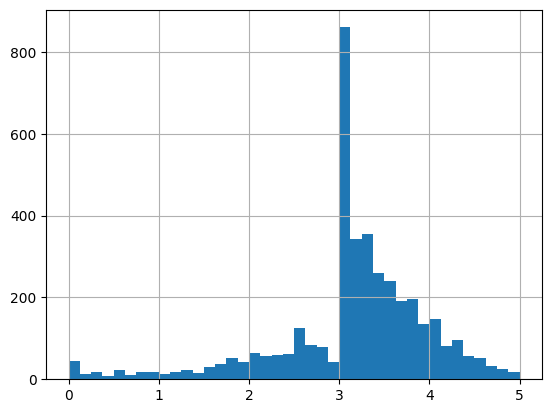

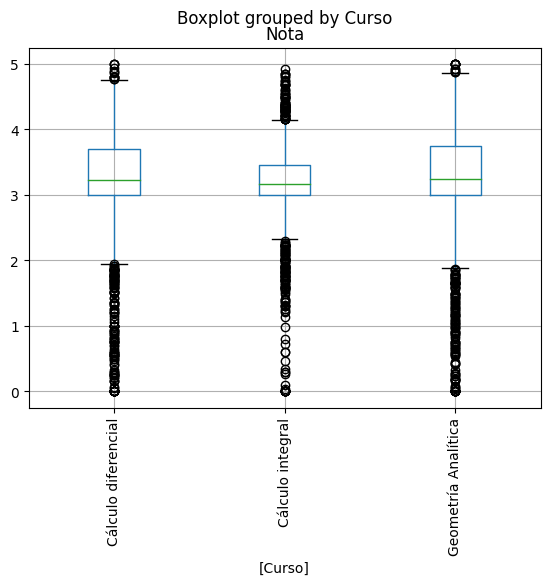

In [11]:
import matplotlib.pyplot as plt
df=data[['Nota', 'Curso']]
df['Nota'].hist(bins=40)
df.boxplot(by='Curso')
plt.xticks(rotation=90);

En el histograma se puede evidenciar una distribución sesgada a la derecha, lo que quiere decir que tenemos dos grupos: los estudiantes que ganan la materia en 3 o más (que son la mayoría como se mencionó anteriormente) y los estudiantes que la pierden.

En el diagrama de cajas y bigotes se observa que los datos están muy distribuidos entre 0 y 5 que es la escala de calificación de la universidad, concentrando la mayoría de estudiantes con notas entre 3 y 4.

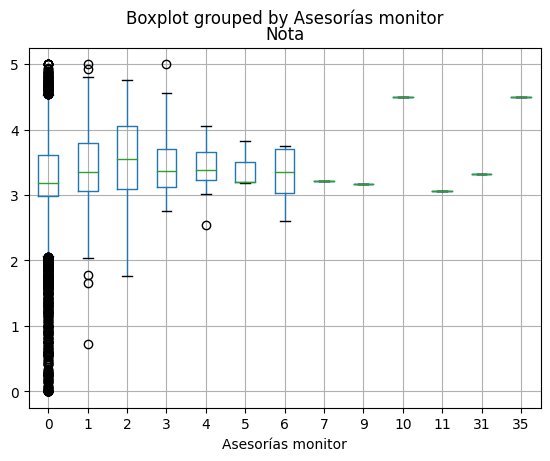

In [12]:
boxplot = data.boxplot(column=["Nota"], by = "Asesorías monitor")
boxplot.plot()

plt.show()

El diagrama de cajas y bigotes muestra la cantidad de asesorías de los monitores a los que asistieron los estudiantes, mostrando nuevamente que la mayoría no fue a ninguna. Aquí se empieza a ver una diferencia con la distribución de notas, puesto que se evidencia que los estudiantes que fueron a más asesorías se encontraban más en el rango de 3 en adelante, es decir que tuvieron notas más altas.

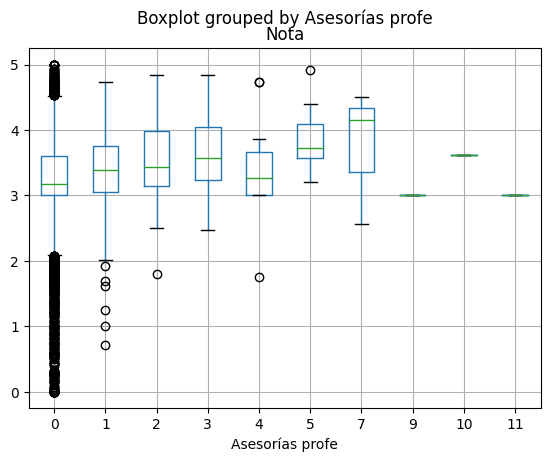

In [13]:
boxplot = data.boxplot(column=["Nota"], by = "Asesorías profe")
boxplot.plot()

plt.show()

El diagrama muestra las asistencias a las asesorías de los profesores, se puede evidenciar nuevamente que a más asistencias de los estudiantes, la nota es mejor (esto se puede evidenciar con la mediana de los datos que aparece en el diagrama de color verde).

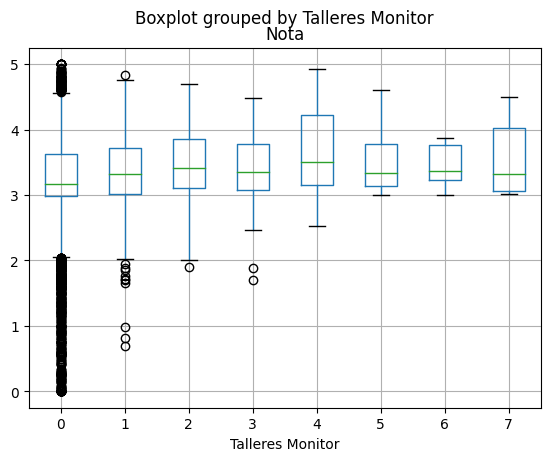

In [14]:
boxplot = data.boxplot(column=["Nota"], by = "Talleres Monitor") 
boxplot.plot()

plt.show()

Las personas con una asistencia a más de 5 talleres, tienen una nota mínima de 3.

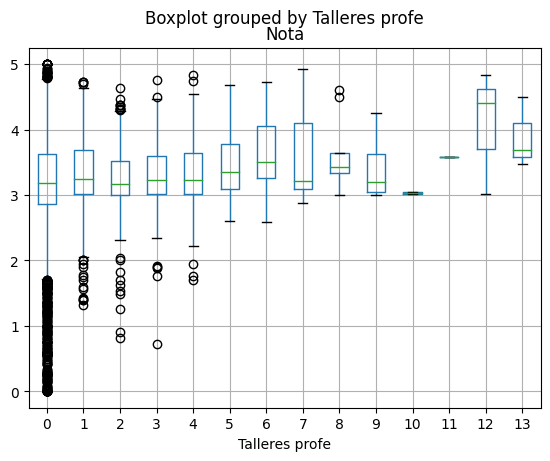

In [15]:
boxplot = data.boxplot(column=["Nota"], by = "Talleres profe")
boxplot.plot()

plt.show()

# Histograma talleres y asesorías

<AxesSubplot: >

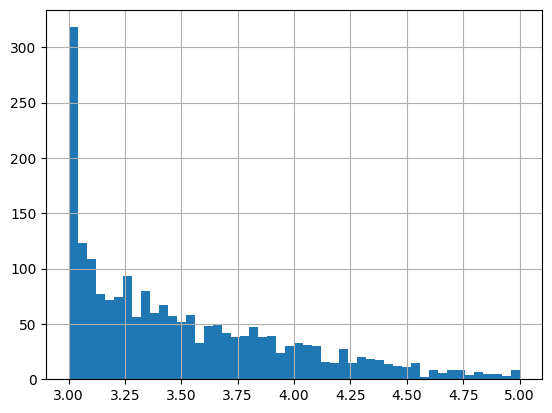

In [16]:
# La cantidad de estudiantes que no asisten ni a los talleres ni a las asesorías con nota
# mayor o igual que 3
data1=data[(data['Nota'] >= 3) & (data['Talleres profe']==0) & (data["Asesorías profe"]==0) & (data["Asesorías monitor"]==0) & (data["Talleres Monitor"]==0)]
data1['Nota'].hist(bins=50)

En este caso, el histograma muestra la cantidad de estudiantes que no asisten ni a los talleres ni a las asesorías con nota mayor o igual que 3 (los que ganan).

<AxesSubplot: >

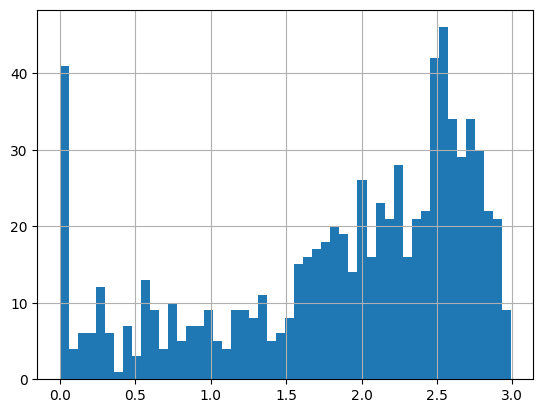

In [17]:
# La cantidad de estudiantes que no asisten ni a los talleres ni a las asesorías con nota
# menor que 3
data2=data[(data['Nota'] < 3) & (data['Talleres profe']==0) & (data["Asesorías profe"]==0) & (data["Asesorías monitor"]==0) & (data["Talleres Monitor"]==0)]
data2['Nota'].hist(bins=50)

El histograma muestra la cantidad de estudiantes que no asisten ni a los talleres ni a las asesorías con nota menor que 3 (los que pierden).

<AxesSubplot: >

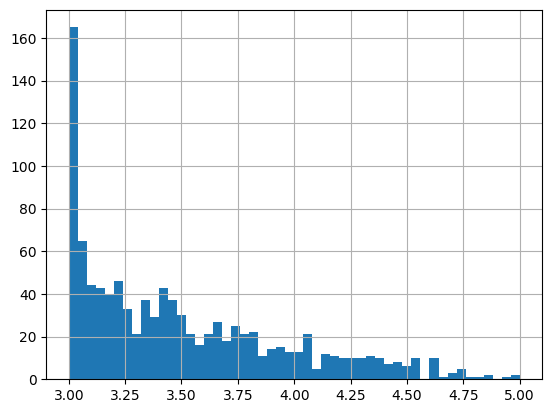

In [18]:
# Estudiantes que si asisten a los talleres y monitorias con una nota mayor o igual que 3.
data3=data[(data['Nota'] >= 3) & ((data['Talleres profe']!=0) | (data["Asesorías profe"]!=0) | (data["Asesorías monitor"]!=0) | (data["Talleres Monitor"]!=0))]
data3['Nota'].hist(bins=50)

<AxesSubplot: >

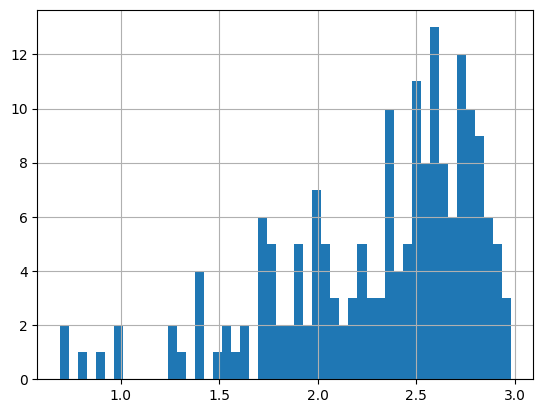

In [19]:
# Estudiantes que si asisten a los talleres y monitorias con una nota menor que 3.
data4=data[(data['Nota'] < 3) & ((data['Talleres profe']!=0) | (data["Asesorías profe"]!=0) | (data["Asesorías monitor"]!=0) | (data["Talleres Monitor"]!=0))]
data4['Nota'].hist(bins=50)

En los anteriores histogramas se evidencia que hay más personas que ganaron la materia en el caso de ir a al menos un taller o una asesoría. Sin embargo, las distribuciones entre estos dos casos son muy parecidas por lo que se necesitaría usar un conjunto de datos más grande y usar estadística inferencial para tomar una decisión.

In [20]:
data1Conteo=data[(data['Talleres profe']!=0) | (data["Asesorías profe"]!=0) | (data["Asesorías monitor"]!=0) | (data["Talleres Monitor"]!=0)]
data1Conteo.value_counts() #31 datos

Curso                Nota  Talleres profe  Talleres Monitor  Asesorías profe  Asesorías monitor
Cálculo integral     3.00  1               0                 0                0                    14
Cálculo diferencial  3.02  1               0                 0                0                     9
Cálculo integral     3.00  2               0                 0                0                     8
                     3.02  1               0                 0                0                     6
                     3.04  1               0                 0                0                     6
                                                                                                   ..
                     2.22  4               0                 0                0                     1
                     2.23  0               0                 0                1                     1
                     2.32  2               0                 0                0         

In [21]:
data1ConteoAlt=data
data1ConteoAlt=data[(data['Talleres profe']==0) & (data["Asesorías profe"]==0) & (data["Asesorías monitor"]==0) & (data["Talleres Monitor"]==0)]
data1ConteoAlt.value_counts()

Curso                Nota  Talleres profe  Talleres Monitor  Asesorías profe  Asesorías monitor
Cálculo integral     3.00  0               0                 0                0                    67
Geometría Analítica  3.00  0               0                 0                0                    46
Cálculo diferencial  3.02  0               0                 0                0                    41
                     3.00  0               0                 0                0                    38
Geometría Analítica  3.01  0               0                 0                0                    32
                                                                                                   ..
Cálculo integral     2.73  0               0                 0                0                     1
                     2.75  0               0                 0                0                     1
Geometría Analítica  1.93  0               0                 0                0         

# Comparaciones entre talleres y asesorías

<AxesSubplot: xlabel='Curso'>

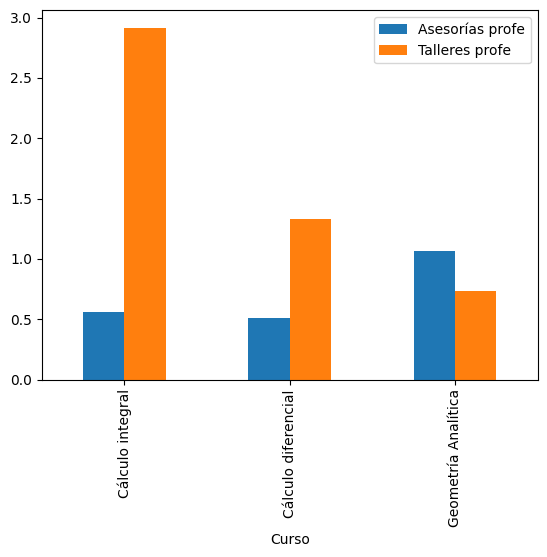

In [22]:
#Es mayor la cantidad de estudiantes que asisten a los talleres que las asesorías de los profesores
asisp=data[(data['Nota']>=3) & ((data['Talleres profe']!=0) | (data["Asesorías profe"]!=0))]
grp=asisp.groupby(by='Curso').agg({'Asesorías profe':'mean', 'Talleres profe':'mean'})
grp.sort_values(by=['Talleres profe'], ascending=False).plot.bar() 

Text(0, 0.5, 'Asesorías profe')

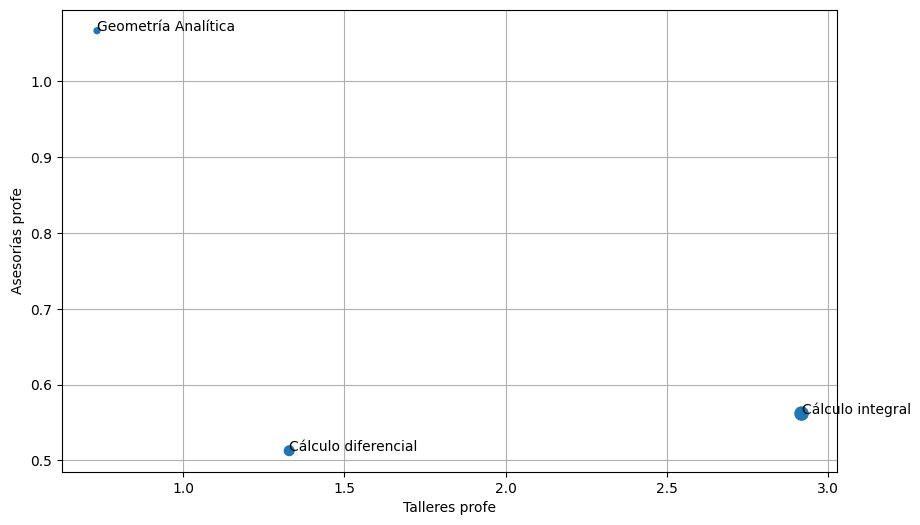

In [23]:
#Aquí mirar la relación entre las variables anteriores y la desviación estándar, que mide la dispersión de los datos. 
#Se evidencia que la dispersión en los estudiantes que asisten y tienen una nota mayor o igual que 3 es mucho menor en geometría analítica 
#que en cálculo diferecial, pero es mayor en cálculo integral.
gr=asisp[asisp['Nota']>=3].groupby(by='Curso').agg({'Talleres profe':['mean','std'], 'Asesorías profe':['mean','std']})
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
x=[]
y=[]
s=[]
for prg, cancel, perd, stdcancel, stdperd, in zip(gr.index, gr['Talleres profe','mean'].values, 
                                                  gr['Asesorías profe','mean'].values,
                                                  gr['Talleres profe','std'].values, 
                                                  gr['Asesorías profe','std'].values):
  x.append(cancel)
  y.append(perd)
  s.append(np.mean([stdcancel, stdperd]))
  plt.text(cancel, perd, prg)
plt.scatter(x,y,np.array(s)*50)
plt.grid()
plt.xlabel('Talleres profe')
plt.ylabel('Asesorías profe')

<AxesSubplot: xlabel='Curso'>

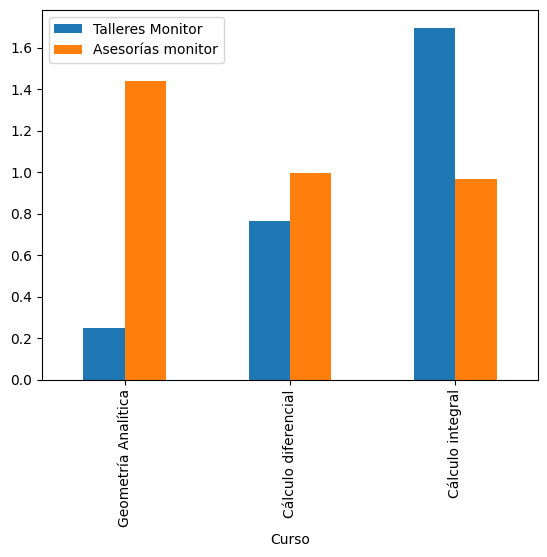

In [24]:
#Es mayor la cantidad de estudiantes que asisten a los talleres que las asesorías de los monitores.
#Sin embargo, la asistencia promedio es muchísimo mejor en los profesores que en los monitores según los datos.
asism=data[(data['Nota']>=3) & ((data['Talleres Monitor']!=0) | (data["Asesorías monitor"]!=0))]
grm=asism.groupby(by='Curso').agg({'Talleres Monitor':'mean', 'Asesorías monitor':'mean'})
grm.sort_values(by=['Asesorías monitor'], ascending=False).plot.bar() 

<AxesSubplot: xlabel='Curso'>

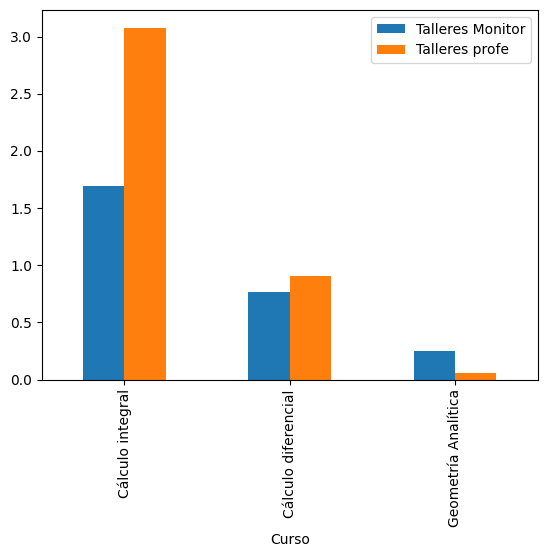

In [25]:
#Es mayor la cantidad de estudiantes que asisten a los talleres que las asesorías  de los profesores en calculo integral.
#Sin embargo, la asistencia promedio es muchísimo mejor en los profesores que en los monitores según los datos.
asispym=data[(data['Nota']>=3) & ((data['Talleres Monitor']!=0) | (data["Talleres profe"]!=0))]
grm=asism.groupby(by='Curso').agg({'Talleres Monitor':'mean', 'Talleres profe':'mean'})
grm.sort_values(by=['Talleres profe'], ascending=False).plot.bar() 

# Comparación de la asistencia en cada materia con respecto a la nota

<AxesSubplot: >

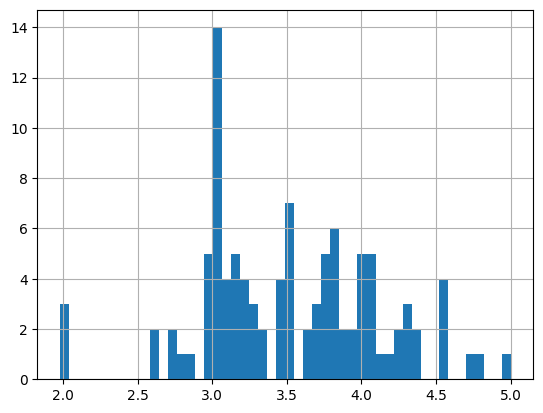

In [26]:
#Asistencia en Geometría Analítica en las asesorías
datageoa=data[(data['Curso']=='Geometría Analítica') & ((data["Asesorías profe"]!=0) | (data["Asesorías monitor"]!=0))]
datageoa['Nota'].hist(bins=50)

<AxesSubplot: >

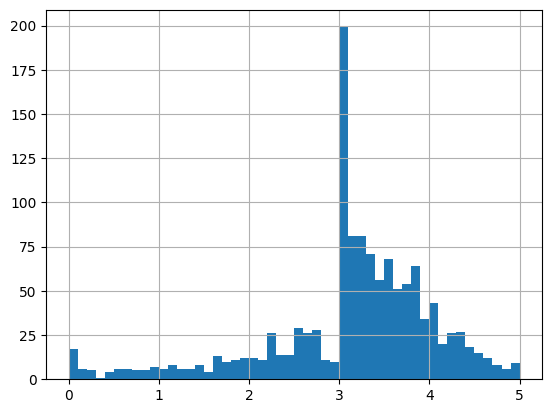

In [27]:
#No asistencia en Geometría Analítica en las asesorías
datanogeoa=data[(data['Curso']=='Geometría Analítica') & (data["Asesorías profe"]==0) & (data["Asesorías monitor"]==0)]
datanogeoa['Nota'].hist(bins=50)

<AxesSubplot: >

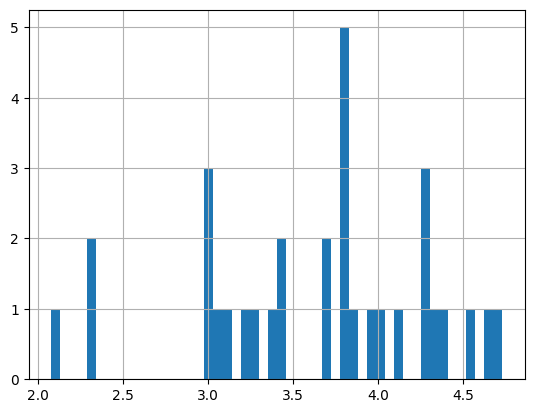

In [28]:
#Asistencia en Geometría Analítica en los talleres
datageot=data[(data['Curso']=='Geometría Analítica') & ((data["Talleres profe"]!=0) | (data["Talleres Monitor"]!=0))]
datageot['Nota'].hist(bins=50)

<AxesSubplot: >

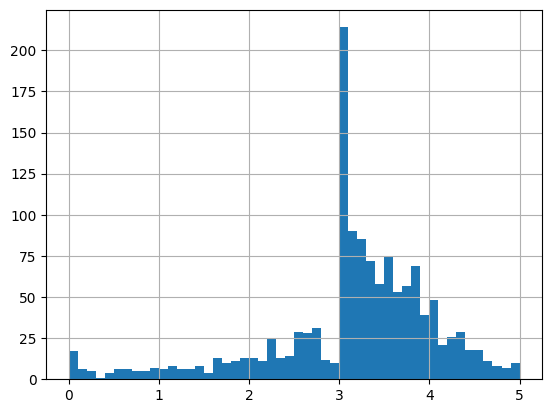

In [29]:
#No asistencia en Geometría Analítica en los talleres
datanogeot=data[(data['Curso']=='Geometría Analítica') & (data["Talleres profe"]==0) & (data["Talleres Monitor"]==0)]
datanogeot['Nota'].hist(bins=50)

<AxesSubplot: >

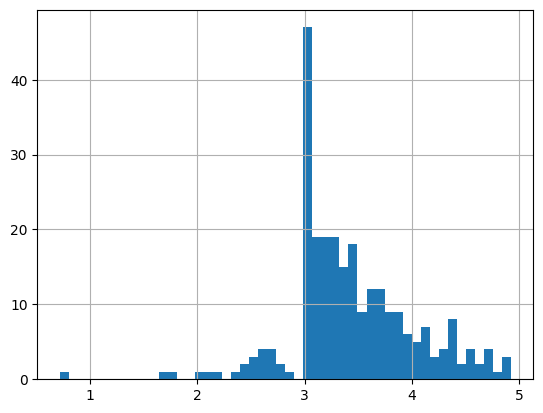

In [30]:
#Asistencia en Cálculo Integral en las asesorías
datainta=data[(data['Curso']=='Cálculo integral') & ((data["Asesorías profe"]!=0) | (data["Asesorías monitor"]!=0))]
datainta['Nota'].hist(bins=50)

<AxesSubplot: >

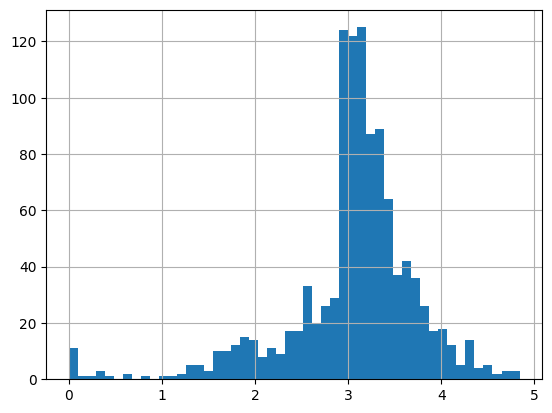

In [31]:
#No asistencia en Cálculo Integral en las asesorías
datanointa=data[(data['Curso']=='Cálculo integral') & (data["Asesorías profe"]==0) & (data["Asesorías monitor"]==0)]
datanointa['Nota'].hist(bins=50)

<AxesSubplot: >

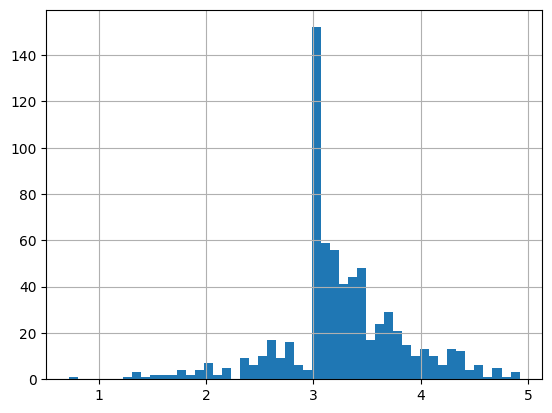

In [32]:
#Asistencia en Cálculo Integral en los talleres
dataintt=data[(data['Curso']=='Cálculo integral') & ((data["Talleres profe"]!=0) | (data["Talleres Monitor"]!=0))]
dataintt['Nota'].hist(bins=50)

<AxesSubplot: >

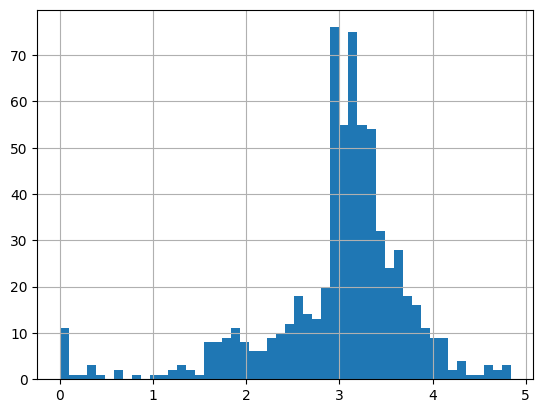

In [33]:
#No asistencia en Cálculo Integral en los talleres
datanointt=data[(data['Curso']=='Cálculo integral') & (data["Talleres profe"]==0) & (data["Talleres Monitor"]==0)]
datanointt['Nota'].hist(bins=50)

<AxesSubplot: >

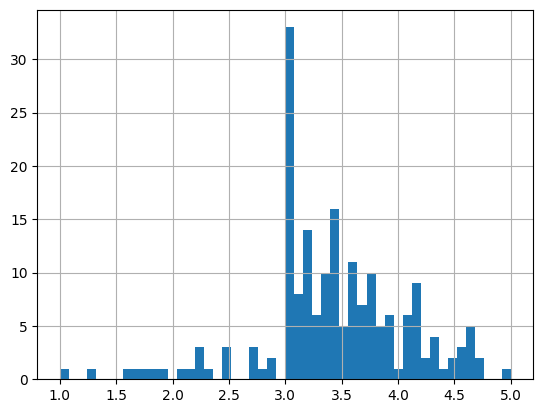

In [34]:
#Asistencia en Cálculo Diferencial en las asesorías
datadifa=data[(data['Curso']=='Cálculo diferencial') & ((data["Asesorías profe"]!=0) | (data["Asesorías monitor"]!=0))]
datadifa['Nota'].hist(bins=50)

<AxesSubplot: >

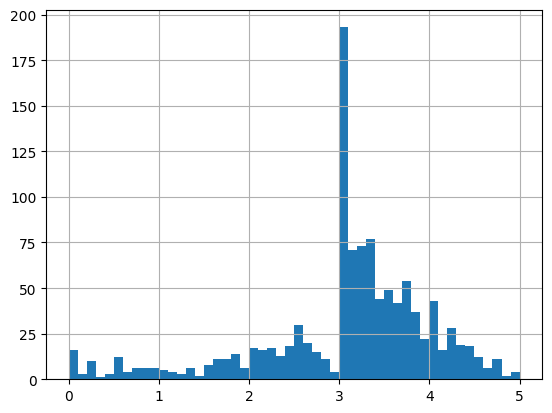

In [35]:
#No asistencia en Cálculo Diferencial en las asesorías
datanodifa=data[(data['Curso']=='Cálculo diferencial') & (data["Asesorías profe"]==0) & (data["Asesorías monitor"]==0)]
datanodifa['Nota'].hist(bins=50)

<AxesSubplot: >

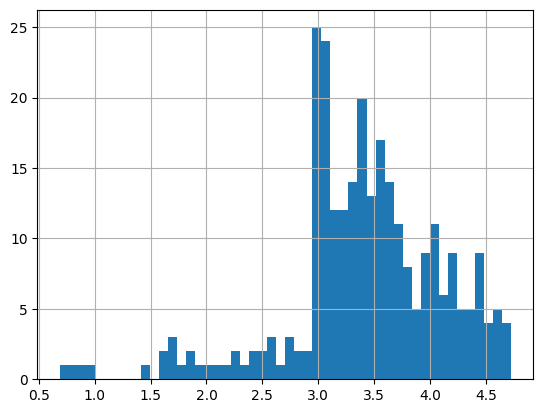

In [36]:
#Asistencia en Cálculo Diferencial en los talleres
datadift=data[(data['Curso']=='Cálculo diferencial') & ((data["Talleres profe"]!=0) | (data["Talleres Monitor"]!=0))]
datadift['Nota'].hist(bins=50)

<AxesSubplot: >

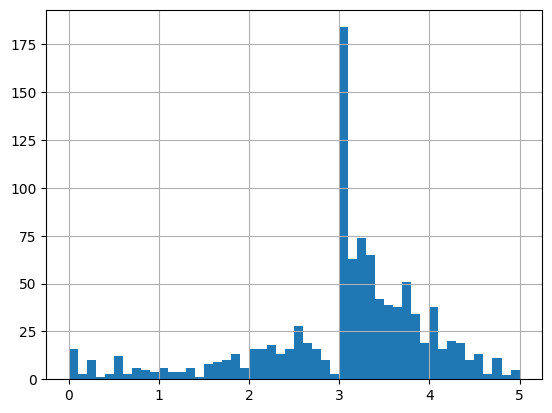

In [37]:
#No asistencia en Cálculo Diferencial en los talleres
datanodift=data[(data['Curso']=='Cálculo diferencial') & (data["Talleres profe"]==0) & (data["Talleres Monitor"]==0)]
datanodift['Nota'].hist(bins=50)

# Dividir las asistencias y reducirlas a 2 grupos diferentes: asistencia y no asistencia para un mejor análisis.

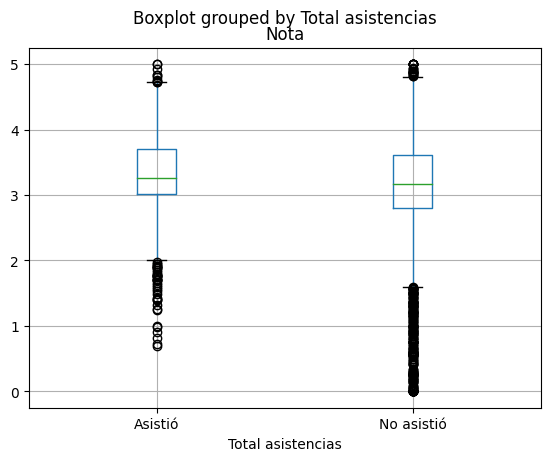

In [38]:
data['Total asistencias'] = data["Asesorías profe"] + data["Asesorías monitor"] + data["Talleres Monitor"] + data["Talleres profe"]
data['Total asistencias'] = np.where(data['Total asistencias'] == 0, 'No asistió', 'Asistió')
boxplot = data.boxplot(column=["Nota"], by = "Total asistencias")
boxplot.plot()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=80c2c5de-e5da-4930-84d9-188ae2608029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>